<a href="https://colab.research.google.com/github/gisellegoiz/Projetos_Data_Science/blob/master/meu_primeiro_projeto_Analisando_os_Dados_do_Airbnb_Rio_de_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="100%" src="https://immub-space.nyc3.digitaloceanspaces.com/texto/slide/ea4a7b1e0d402bcb9f7bb798564e7bf6.jpg">



# **Análise de Dados do Airbnb - Rio de Janeiro**
*by [Giselle Goiz](https://github.com/gisellegoiz/Projetos_Data_Science) - Aluna do curso <img alt="Colaboratory logo" width="10%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">*


---


#### O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Maravilhosa, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

Todos os dados usados aqui foram obtidos a partir do site [Inside Airbnb](http://insideairbnb.com/get-the-data.html/).

Para esta análise exploratória inicial, foi utilizado o seguinte arquivo:

listings.csv - Summary information and metrics for listings in Rio de Janeiro (good for visualisations).

Optei pelo **meu Rio de Janeiro* rs, pois, para um primeiro projeto achei importante utilizar dados de um lugar que eu conheço, afim de conseguir visualizar possíveis discrepâncias e realizar a análise com maior confiaça.


In [ ]:
# importando os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# importando o arquivo listings.csv para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2020-05-24/visualisations/listings.csv")


## Análise dos Dados


**Dicionário das variáveis**

* id	= Número de identificação do anúncio
* name = Titulo do anúncio
* host_id = Número de identificação do dono do anúncio 
* host_name = Nome do dono do anúncio
* neighbourhood_group = variável sem dados preenchidos
* neighbourhood = Bairros
* latitude = Coordenada da latitude da propriedade
* longitude = Coordenada da longitude da propriedade
* room_type = Tipo de acomodação 
* price = Preço da reserva
* minimum_nights = Minimo de noites para estadia
* number_of_reviews = Número de reviews que a propriedade possui
* last_review = Data do último review
* reviews_per_month = Número de reviews que a propriedade possui por mês
* calculated_host_listings_count = Quantidade de anúncios do mesmo dono
* availability_365 = quantidade de dias de disponibildade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [ ]:
# mostrar as 5 primeiras entradas
df.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,17878,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",68997,Matthias,NaN,Copacabana,-22.96592,-43.17896,Entire home/apt,188,7,251,2020-04-06,2.09,1,335
1,21280,Renovated Modern Apt. Near Beach,81163,Jules,NaN,Ipanema,-22.98467,-43.19611,Entire home/apt,442,5,94,2020-03-22,1.23,1,90
2,25026,Beautiful Modern Decorated Studio in Copa,102840,Viviane,NaN,Copacabana,-22.97712,-43.19045,Entire home/apt,160,7,238,2020-02-15,1.96,3,129
3,31560,NICE & COZY 1BDR - IPANEMA BEACH,135635,Renata,NaN,Ipanema,-22.98302,-43.21427,Entire home/apt,359,2,282,2020-03-02,2.35,1,0
4,35636,Cosy flat close to Ipanema beach,153232,Patricia,NaN,Ipanema,-22.98816,-43.19359,Entire home/apt,495,2,181,2020-03-15,2.25,1,357


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [ ]:
# identificar o volume de dados do DataFrame
print("Entradas:\t{}".format(df.shape[0]))
print("Variáveis:\t{}\n".format(df.shape[1]))



Entradas:	35793
Variáveis:	16



In [ ]:
# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.00000
reviews_per_month                 0.41645
last_review                       0.41645
name                              0.00162
host_name                         0.00014
availability_365                  0.00000
calculated_host_listings_count    0.00000
number_of_reviews                 0.00000
minimum_nights                    0.00000
price                             0.00000
room_type                         0.00000
longitude                         0.00000
latitude                          0.00000
neighbourhood                     0.00000
host_id                           0.00000
id                                0.00000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 


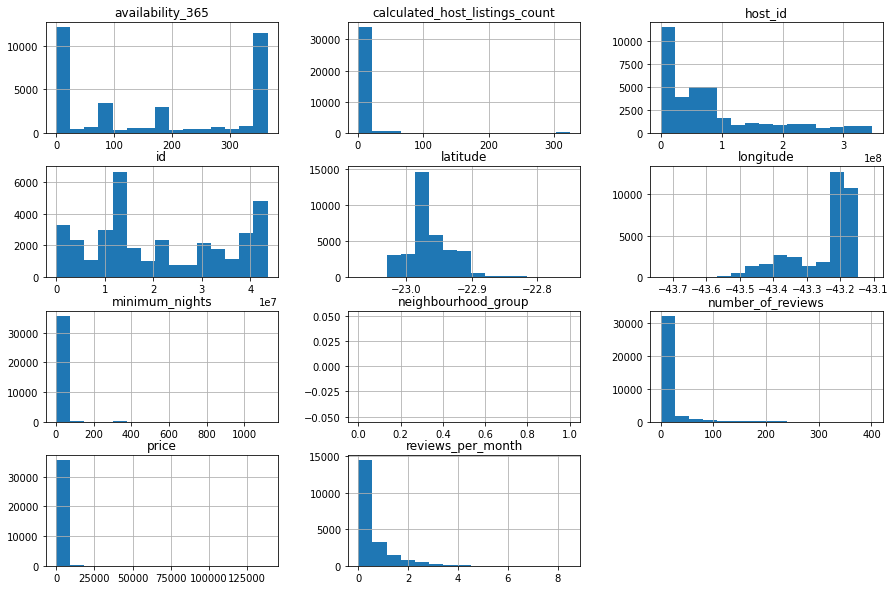

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));


### **Q4. Qual a média dos preços de aluguel?**

In [ ]:
#Pela distribuição do histograma, é possível verificar indícios da presença de outliers. Olhe por exemplo as variáveis price, minimum_nights e calculated_host_listings_count.

#Os valores não seguem uma distruição, e distorcem toda a representação gráfica. Para confirmar, há duas maneiras rápidas que auxiliam a detecção de outliers. São elas:

#Resumo estatístico por meio do método describe()
#Plotar boxplots para a variável.

# ver a média da coluna `price``
df[['price']].describe()

,price
count,35793.000000
mean,795.617858
std,2452.937585
min,0.000000
25%,159.000000
50%,299.000000
75%,649.000000
max,138288.000000


In [ ]:
# ver o resumo estatístico das variáveis numéricas
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,35793.000000,35793.000000,35793.000000,20887.000000,35793.000000,35793.000000
mean,795.617858,4.797586,9.747576,0.581955,8.189059,171.900455
std,2452.937585,21.844137,25.828574,0.763331,34.830690,154.647434
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,159.000000,1.000000,0.000000,0.120000,1.000000,0.000000
50%,299.000000,2.000000,1.000000,0.300000,1.000000,160.000000
75%,649.000000,4.000000,6.000000,0.720000,3.000000,362.000000
max,138288.000000,1123.000000,401.000000,8.490000,324.000000,365.000000


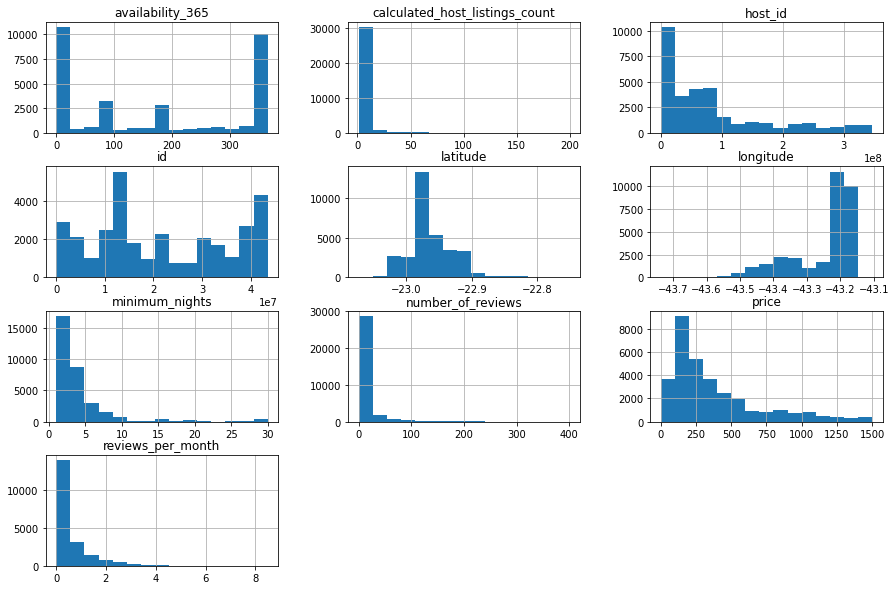

In [ ]:
# remover os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

# remover `neighbourhood_group`, pois está vazio
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

# plotar o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

### **Q4.1. Qual a correlação existente entre as variáveis**

In [ ]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.150570,-0.161228,-0.165647,0.041941,-0.029684
minimum_nights,0.150570,1.000000,-0.050160,-0.057192,-0.030734,-0.022024
number_of_reviews,-0.161228,-0.050160,1.000000,0.704778,-0.024119,0.049502
reviews_per_month,-0.165647,-0.057192,0.704778,1.000000,-0.014407,-0.021934
calculated_host_listings_count,0.041941,-0.030734,-0.024119,-0.014407,1.000000,0.075923
availability_365,-0.029684,-0.022024,0.049502,-0.021934,0.075923,1.000000


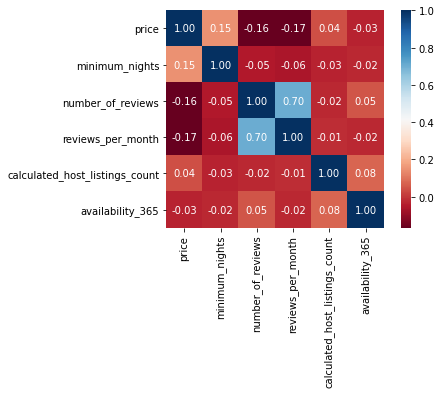

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='White', annot=True);


### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()


Entire home/apt    22363
Private room        8905
Shared room          751
Hotel room           155
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]


Entire home/apt    0.695064
Private room       0.276776
Shared room        0.023342
Hotel room         0.004818
Name: room_type, dtype: float64

### **Q6. Qual a localidade mais cara do dataset?**



In [ ]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]



neighbourhood
Vaz Lobo                  884.333333
Caju                      660.500000
Ricardo de Albuquerque    610.600000
Lagoa                     524.355828
Abolição                  494.000000
Leblon                    493.765255
Alto da Boa Vista         488.525000
Inhoaíba                  480.000000
Jacarepaguá               477.753898
Anchieta                  476.200000
Name: price, dtype: float64

Acima, vemos que bairros como Vaz Lobo, Engenheiro Albuquerque e Paciência, estão com média de preço superior a de lugares como Leblon, Barra da Tijuca e Lagoa.

Eu como carioca, sei que esses bairros não tem um custo de vida tão alto que justifiquem uma média de preço mais elevada do que bairros nobres e caros como o Leblon.

Diante disso, vamos verificar os dados referentes ao bairro de Vaz Lobo...

In [ ]:
# ver quantidade de imóveis no Vaz Lobo
print(df_clean[df_clean.neighbourhood == "Vaz Lobo"].shape)

# ver as 3 entradas do Complexo do Alemão
df_clean[df_clean.neighbourhood == "Vaz Lobo"]

(3, 15)


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
2909,2768499,Próximo ao Maracanã,14157867,Fernando,Vaz Lobo,-22.85955,-43.32918,Private room,1001,1,0,NaN,NaN,1,0
15766,14221134,"casa colonial 3 quartos, garagem",86402266,Lucia,Vaz Lobo,-22.85583,-43.32441,Entire home/apt,1350,15,0,NaN,NaN,1,365
33494,42012781,Casas flegler,332881900,Igor Flegler De Souza,Vaz Lobo,-22.86070,-43.32446,Private room,302,1,0,NaN,NaN,1,363


Os Bairros de Vaz lobo, Ricardo de Albuquerque e Caju, não possuem muitos imóveis para hospedagem pelo Airnb, isso acaba afetando a média de preços desses bairros.



***Vamos analisar adiante , quais são os 10 bairros mais desejados***


In [ ]:
# Bairros com mais reviews

df_clean.groupby(['neighbourhood']).number_of_reviews.sum().sort_values(ascending=False)[:10]


neighbourhood
Copacabana         134089
Ipanema             54803
Barra da Tijuca     28743
Leblon              22028
Botafogo            15696
Santa Teresa        11425
Centro              11164
Jacarepaguá          7940
Flamengo             7397
Leme                 7195
Name: number_of_reviews, dtype: int64

In [ ]:
# 10 bairros que possuem mais imóveis no Airbnb do Rio de Janeiro
df_clean.neighbourhood.value_counts(ascending=False)[:10]

Copacabana                  8754
Barra da Tijuca             3255
Ipanema                     2664
Jacarepaguá                 1796
Botafogo                    1685
Recreio dos Bandeirantes    1453
Leblon                      1393
Santa Teresa                1096
Centro                       953
Flamengo                     854
Name: neighbourhood, dtype: int64

#####*É possivel observar que os bairros com maior número de imóveis, também apresentam maior número de reviews*


### **Onde ficam os imoveis mais procurados do Airbnb na cidade do Rio de Janeiro?**

#####A maioria dos imóveis do Airbnb no Rio de Janeiro estão concentrados nos bairros da Zona Sul e Centro, esses locais são os queridinhos de quem vem a passeio ou a trabalho.

Na Zona Sul temos as famosas praias de Copacabana, Arpoador e Ipanema. No Centro, bem próximo a maioria dos escritorios, temos Lapa e Santa Teresa, bairros famosos pela Boemia Carioca, repletos de opções de bares e restaurantes, isso facilita o Happy Hour rs.





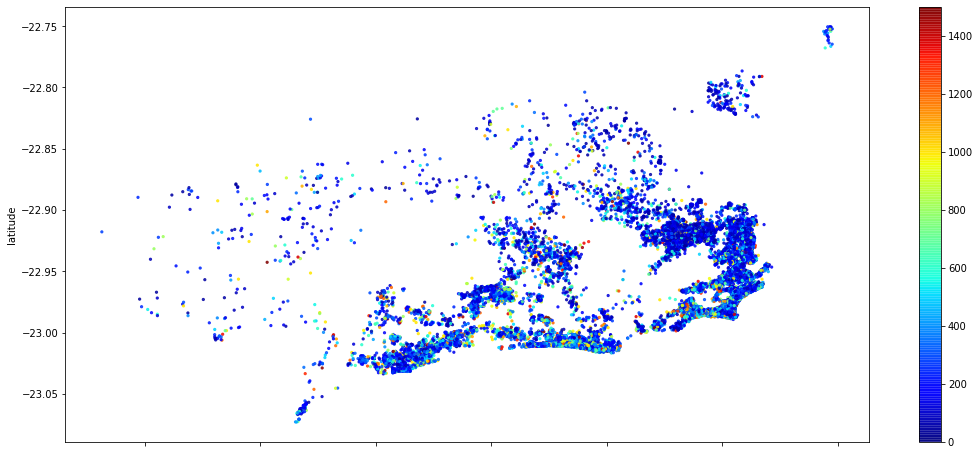

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x="longitude" ,y="latitude", alpha=.8, c=df_clean['price'], s=5, cmap=plt.get_cmap('jet'), figsize=(18,8));


![alt text](https://pt.mapsofworld.com/brasil/maps/rio-tourist-attractions-map.jpg)


---











### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# ver a média da coluna `minimum_nights`
df_clean[["minimum_nights"]].describe()


,minimum_nights
count,32174.000000
mean,3.505501
std,4.147284
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,30.000000


## Conclusões


Esta foi uma análise simples, realizada com base em uma versão resumida do dataset do Airbnb para a cidade do Rio de Janeiro, com ituito de ver na prática dados sendo transformados em informações, utilizando ***Python***. 

Com esta breve análise podemos observar a distribuição de imóveis no Rio de Janeiro, verificar a presença de *outliers* em algumas variáveis e constatar a distorção de informações estatisticas em alguns atributos.

Para os próximos projetos, serão realizadas analises mais profundas, utilizando *datasets* mais robustos e outros recursos de ***Python***. Assim espero rs!!!
